## Feed Forward Neural Network

(based on a tutorial by Python Engineer in Youtube)

Here we will implement a multilayer neural network that can do digit classification based on MNIST dataset.

What we will use:

    - DataLoader: to load the dataset
    - Transformation: apply a transform to dataset
    - Multilayer Neural Net: input,hidden,output layers
    - Activation Function
    - Loss
    - Optimizer
    - Training Loop (batch training)
    - Model Evaluation
    - GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
!rm -rf /logs/

In [13]:
#device config
#if we have GPU it will work with it else with CPU, we must push our tensors to the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [14]:
# hyperparameters
input_size = 784   #because the images are 28x28 and we will flat the array to 1D tensor
hidden_size = 100  #you can use other dim too.
num_classes = 10   #we have 10 classes in the dataset
num_epochs = 2      #so that it won't get long time
batch_size = 100
learning_rate = 0.001

In [15]:
# import MNIST data
#must be in the same folder, it's for training, we add a transform and convert data to tensors, it must be 
#downloaded if we have'nt done that yet
train_dataset = torchvision.datasets.MNIST(root='./data', train=True
                                          ,transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False
                                          ,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size
                                          , shuffle=True) # shuffle is good for training

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [16]:
#let's look at one batch of this data
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape) 

torch.Size([100, 1, 28, 28]) torch.Size([100])


samples:
100 is the batch size.
1 is the number of color channels.
28x28 the image array.

labels:
For each class label we have one value.

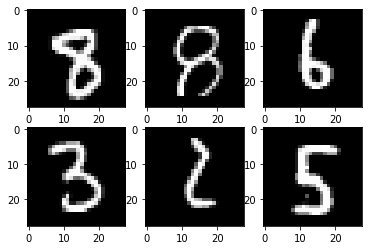

In [17]:
#plot
for i in range(6):
    plt.subplot(2, 3, i+1)   #2 raws, 3 columns, in index i+1
    plt.imshow(samples[i][0], cmap='gray')
    #we want to show the actual data here, [i][0] to access the first channel, and the color map is set to gray
plt.show()

In [18]:
#now we want to classify these digits so we need a fully connected neural network with one hidden layer.


In [19]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): #num_classes is the output size
        super(NeuralNet, self).__init__()
        
        #fist layer
        self.l1 = nn.Linear(input_size, hidden_size)
        
        #activation function
        self.relu = nn.ReLU()
        
        #another linear layer
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        #now we use all above layers
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        #cross entropy will implement softmax,too, so we don't add softmax here
        
        return out
    

model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):    #unpacking, enumerate give us the index
        #we have to reshape our images first because this is 100 * 1 * 28 * 28
        #but now input size is 784 so our images tensors needs the size 100 * 784
        #first the number of batches then images size
        images = images.reshape(-1, 28*28).to(device) # and send it to GPU if it's there
        
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels) #predicted output and actual labels
        
        
        #backward
        
        #empty the grads
        optimizer.zero_grad()
        loss.backward()
        
        #update
        optimizer.step()
        
        if(i+1)%100 == 0:
            print(f'epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}')
        

epoch 1/ 2, step 100/600,loss = 0.3966
epoch 1/ 2, step 200/600,loss = 0.4475
epoch 1/ 2, step 300/600,loss = 0.2905
epoch 1/ 2, step 400/600,loss = 0.2520
epoch 1/ 2, step 500/600,loss = 0.1490
epoch 1/ 2, step 600/600,loss = 0.2753
epoch 2/ 2, step 100/600,loss = 0.2251
epoch 2/ 2, step 200/600,loss = 0.2763
epoch 2/ 2, step 300/600,loss = 0.1613
epoch 2/ 2, step 400/600,loss = 0.1172
epoch 2/ 2, step 500/600,loss = 0.3433
epoch 2/ 2, step 600/600,loss = 0.1171


In [21]:
# test
with torch.no_grad():
    n_correct = 0 
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device) # and send it to GPU if it's there
        labels = labels.to(device)
        outputs = model(images)
        
        #torch.max returns value and index but we need index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]  #number of sample and current batch = should be 100
        print(n_samples)
        n_correct += (predictions == labels).sum().item()
        
        
    acc = 100.0 * n_correct / n_samples #accuracy
    print(f'accuracy = {acc}')

100
accuracy = 98.0
200
accuracy = 98.5
300
accuracy = 97.66666666666667
400
accuracy = 96.75
500
accuracy = 96.4
600
accuracy = 95.83333333333333
700
accuracy = 95.42857142857143
800
accuracy = 95.375
900
accuracy = 95.22222222222223
1000
accuracy = 95.2
1100
accuracy = 94.81818181818181
1200
accuracy = 94.58333333333333
1300
accuracy = 94.23076923076923
1400
accuracy = 94.14285714285714
1500
accuracy = 94.2
1600
accuracy = 94.0
1700
accuracy = 94.11764705882354
1800
accuracy = 94.11111111111111
1900
accuracy = 94.10526315789474
2000
accuracy = 94.05
2100
accuracy = 93.76190476190476
2200
accuracy = 93.54545454545455
2300
accuracy = 93.52173913043478
2400
accuracy = 93.5
2500
accuracy = 93.56
2600
accuracy = 93.6923076923077
2700
accuracy = 93.74074074074075
2800
accuracy = 93.82142857142857
2900
accuracy = 93.96551724137932
3000
accuracy = 93.96666666666667
3100
accuracy = 94.03225806451613
3200
accuracy = 94.0
3300
accuracy = 94.0909090909091
3400
accuracy = 94.20588235294117
3500
a